## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

## Data Pre-processing

In [4]:
categorical_x = ['species', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [5]:
## If y is categorical:
y.fillna(y.mode(), inplace= True)
##If y is numerical
# y.fillna(y.mean(), inplace= True)
for i in numerical_x:
    X[i].fillna(X[i].mean(), inplace = True)

for i in categorical_x:
    X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

In [7]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Evaluation

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
metrics.accuracy_score(y_test,y_pred)

0.782608695652174

In [13]:
metrics.confusion_matrix(y_test,y_pred)

array([[30,  1,  2],
       [ 3, 22,  2],
       [ 1,  6,  2]], dtype=int64)

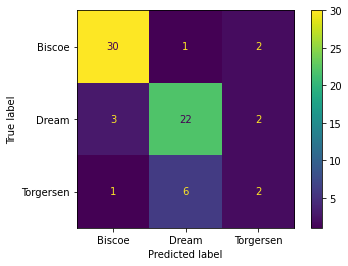

In [14]:
metrics.plot_confusion_matrix(knn_model, X_test,y_test)

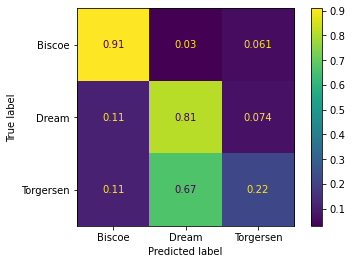

In [15]:
metrics.plot_confusion_matrix(knn_model, X_test,y_test,normalize='true')

In [16]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.88      0.91      0.90        33
       Dream       0.76      0.81      0.79        27
   Torgersen       0.33      0.22      0.27         9

    accuracy                           0.78        69
   macro avg       0.66      0.65      0.65        69
weighted avg       0.76      0.78      0.77        69



## Elbow method

In [17]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - metrics.accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

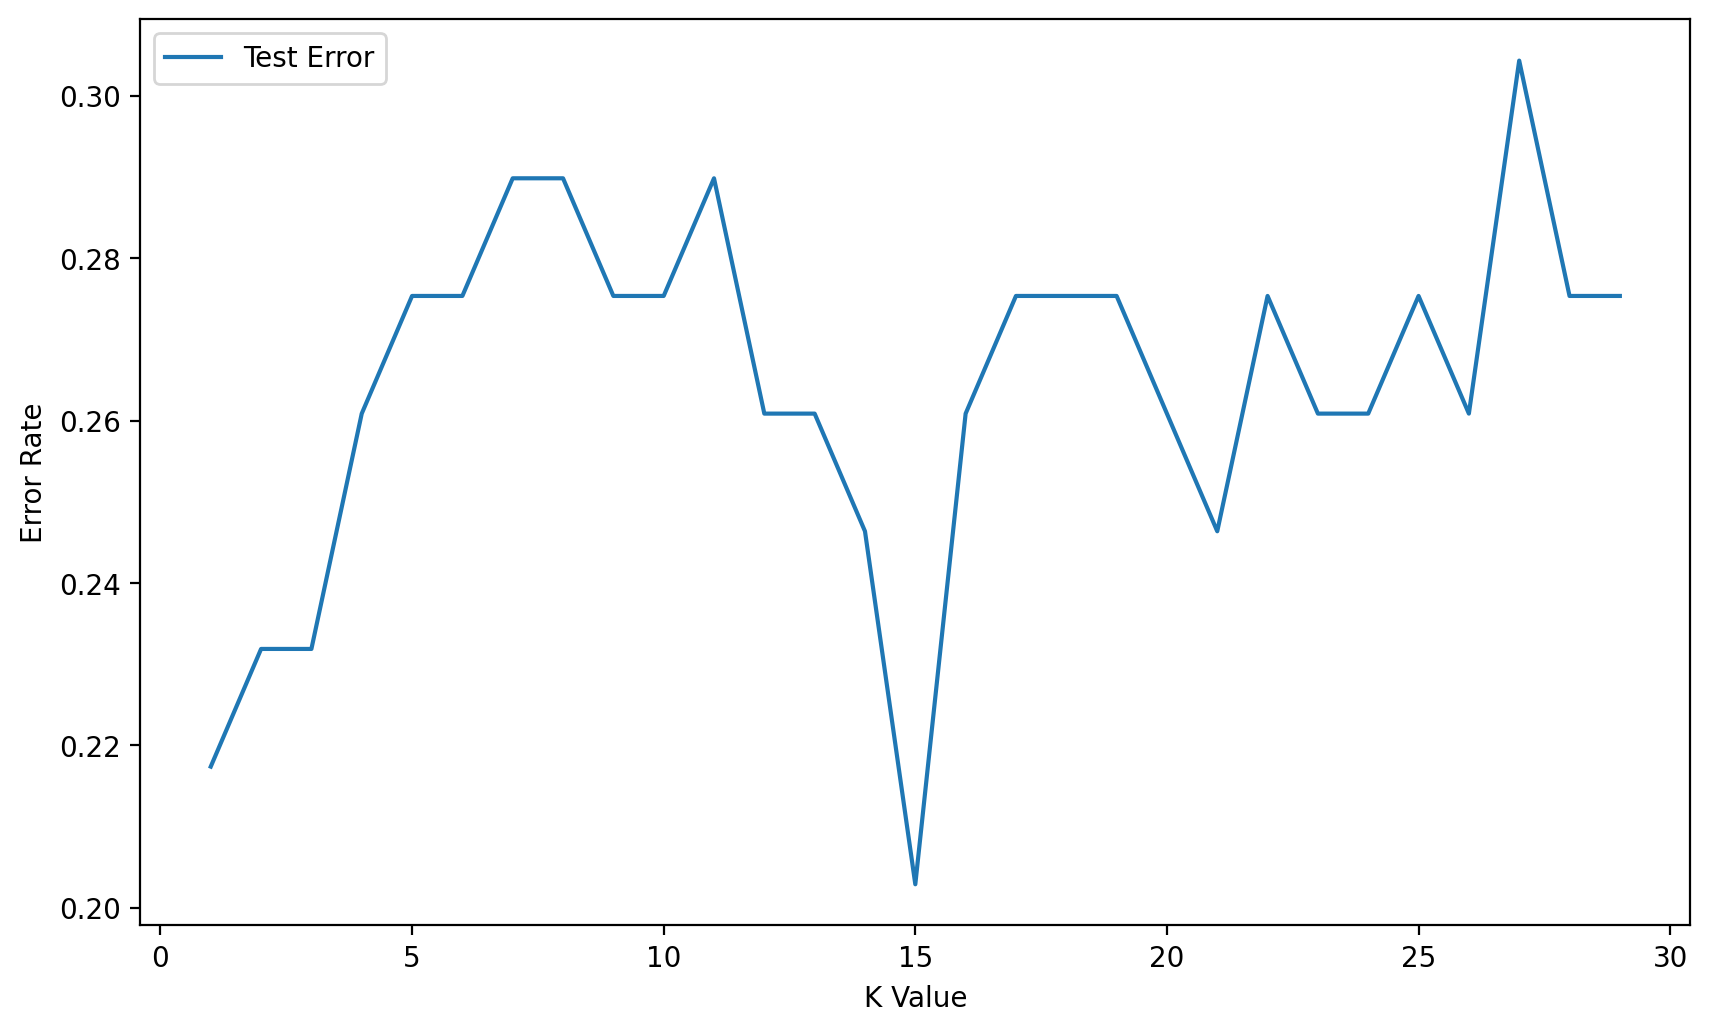

In [18]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

## Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
knn_model = KNeighborsClassifier()

In [21]:
n_neighbors = np.linspace(1,30, 30).astype(int)

In [22]:
grid_model = GridSearchCV(knn_model,param_grid={'n_neighbors':n_neighbors}, cv = 5, scoring='accuracy')

In [23]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [24]:
grid_model.best_params_

{'n_neighbors': 9}

In [25]:
y_pred = grid_model.predict(X_test)

In [26]:
metrics.accuracy_score(y_test,y_pred)

0.7246376811594203

In [27]:
metrics.confusion_matrix(y_test,y_pred)

array([[28,  2,  3],
       [ 5, 21,  1],
       [ 5,  3,  1]], dtype=int64)

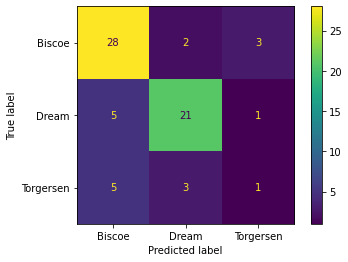

In [28]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test)

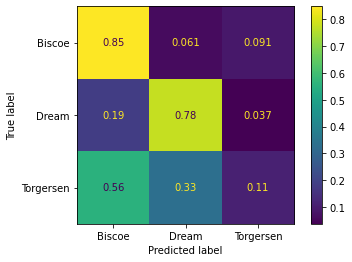

In [29]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test,normalize='true')

In [30]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.74      0.85      0.79        33
       Dream       0.81      0.78      0.79        27
   Torgersen       0.20      0.11      0.14         9

    accuracy                           0.72        69
   macro avg       0.58      0.58      0.57        69
weighted avg       0.69      0.72      0.71        69



## Pipeline

In [31]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

In [32]:
categorical_x = ['species', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [33]:
## If y is categorical:
y.fillna(y.mode(), inplace= True)
##If y is numerical
# y.fillna(y.mean(), inplace= True)
for i in numerical_x:
    X[i].fillna(X[i].mean(), inplace = True)

for i in categorical_x:
    X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

## Pipeline Process

In [35]:
scaler = StandardScaler()

In [36]:
knn = KNeighborsClassifier()

In [37]:
operations = [('scaler',scaler),('knn',knn)]

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe = Pipeline(operations)

In [40]:
k_values = list(range(1,30))

In [41]:
param_grid = {'knn__n_neighbors': k_values}

In [42]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [43]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [44]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [45]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [46]:
pd.DataFrame(full_cv_classifier.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007340,0.000961,0.005754,0.000807,1,{'knn__n_neighbors': 1},0.690909,0.727273,0.636364,0.709091,0.672727,0.687273,0.031281,4
1,0.006346,0.000732,0.005555,0.000586,2,{'knn__n_neighbors': 2},0.654545,0.654545,0.618182,0.727273,0.727273,0.676364,0.043636,17
2,0.006154,0.000240,0.005551,0.000200,3,{'knn__n_neighbors': 3},0.690909,0.727273,0.654545,0.690909,0.672727,0.687273,0.024121,4
3,0.005754,0.000243,0.004968,0.000011,4,{'knn__n_neighbors': 4},0.654545,0.727273,0.654545,0.690909,0.636364,0.672727,0.032525,25
4,0.005754,0.000401,0.004960,0.000315,5,{'knn__n_neighbors': 5},0.654545,0.672727,0.654545,0.654545,0.690909,0.665455,0.014545,28
5,0.005761,0.000234,0.004961,0.000013,6,{'knn__n_neighbors': 6},0.672727,0.690909,0.672727,0.690909,0.654545,0.676364,0.013606,17
6,0.006048,0.000480,0.004959,0.000011,7,{'knn__n_neighbors': 7},0.709091,0.654545,0.672727,0.690909,0.709091,0.687273,0.021203,4
7,0.005948,0.000308,0.005254,0.000396,8,{'knn__n_neighbors': 8},0.690909,0.672727,0.654545,0.654545,0.690909,0.672727,0.016262,20
8,0.005754,0.000243,0.005068,0.000374,9,{'knn__n_neighbors': 9},0.709091,0.690909,0.654545,0.727273,0.709091,0.698182,0.024663,1
9,0.005756,0.000393,0.005058,0.000204,10,{'knn__n_neighbors': 10},0.672727,0.690909,0.672727,0.672727,0.672727,0.676364,0.007273,16


In [47]:
y_pred = full_cv_classifier.predict(X_test)

In [48]:
metrics.accuracy_score(y_test,y_pred)

0.7246376811594203

In [49]:
metrics.confusion_matrix(y_test,y_pred)

array([[28,  2,  3],
       [ 5, 21,  1],
       [ 5,  3,  1]], dtype=int64)

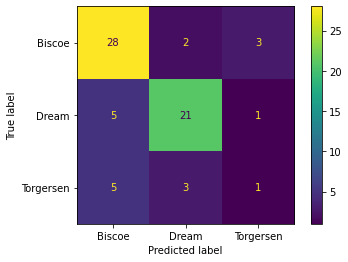

In [50]:
metrics.plot_confusion_matrix(full_cv_classifier, X_test,y_test)

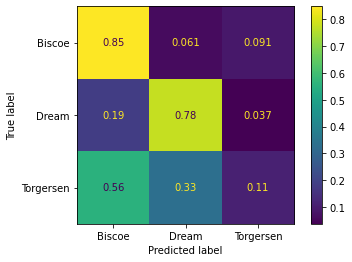

In [51]:
metrics.plot_confusion_matrix(full_cv_classifier, X_test,y_test,normalize='true')

In [52]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.74      0.85      0.79        33
       Dream       0.81      0.78      0.79        27
   Torgersen       0.20      0.11      0.14         9

    accuracy                           0.72        69
   macro avg       0.58      0.58      0.57        69
weighted avg       0.69      0.72      0.71        69



## Final Model

In [53]:
scaler = StandardScaler()
knn9 = KNeighborsClassifier(n_neighbors=9)
operations = [('scaler',scaler),('knn9',knn9)]

In [54]:
pipe = Pipeline(operations)

In [55]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn9', KNeighborsClassifier(n_neighbors=9))])

In [56]:
pipe_pred = pipe.predict(X_test)

In [58]:
print(metrics.classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

      Biscoe       0.74      0.85      0.79        33
       Dream       0.81      0.78      0.79        27
   Torgersen       0.20      0.11      0.14         9

    accuracy                           0.72        69
   macro avg       0.58      0.58      0.57        69
weighted avg       0.69      0.72      0.71        69



In [59]:
single_sample = X_test.iloc[40]

In [60]:
pipe.predict(single_sample.values.reshape(1, -1))

array(['Torgersen'], dtype=object)

In [61]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[0.11111111, 0.33333333, 0.55555556]])